## This notebook provide the instructions on how to read the LLC4320 data from the OSDF/Pelican using OpenVisus framework.

<b>FIRSTLY</b> go to `installation.md` and follow the installation guide! Be sure to preview the markdown file, as it is was written to be viewed as such and is much easier to read this way.

# **Step 1: Importing the libraries**

In [1]:
import numpy as np
import openvisuspy as ovp
import matplotlib.pyplot as plt
import os

# lokalni cache naredimo, kar v naši mapi kjer imamo ta ipynb
os.environ['VISUS_CACHE']= "./visus_cache_can_be_deleted"

# prisilimo os, da naredi mapo, kjer bomo shranjevali cache
os.makedirs(os.environ["VISUS_CACHE"], exist_ok=True)

: 

### The section below shows different LLC4320 fields we have available in cloud. Each field is >400TB.

OpenVisus je narejen tako, da v linku definiraš <b>spremenljivke</b>. Se pravi za salinity smo definirali `x`, `y` in `depth` spremenljivke. Ko naložimo dataset, lahko nato s knjižnico spreminjamo te definirane spremenljivke in dostopamo do podatkov na semantično pravilen način, da ni v xml datoteki npr. vse definirano ali v stringu, ker potem interpreter ne more ujeti napak.

`!Importante`: z dostopom preko pelican dostopne točke je problem, ker nam vrača prazen content. Pisal sem vzdrževalcu databasa, ki je predlagal da uporabimo kar https direkten dostop. Sicer verjetno impacta performance, ker je pelican skrbel za caching in optimal access, ampak kot bi UPK asistent rekel: "a JBG."

In [18]:
# SPODNJA KODA OSTAJA napisana, da se vidi kateri access pointi so bili uporabljeni za temperaturo, salinity in vertical velocity. Da jih lahko transformiramo v https linke in normalno dostopamo do njih.

#available options=[salt, theta,  w]; choose one below.. lets say, we select w for now 
variable = 'w'

#or direct links
temperature="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/theta/theta_llc4320_x_y_depth.idx"

salinity="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/salt/salt_llc4320_x_y_depth.idx"

vertical_velocity="pelican://osg-htc.org/nasa/nsdf/climate2/llc4320/idx/w/w_llc4320_x_y_depth.idx"

# Step 3: Load the 4320 dataset from OSDF.. if  salt or theta is selected above, change climate2 to climate1 below, or directly use the variable defined above.

field = "pelican://osg-htc.org/nasa/nsdf/climate2/llc4320/idx/w/w_llc4320_x_y_depth.idx"

## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [20]:
# ker so težave s pelicanom, mogoče, ker nismo v ameriki or god knows, nam je gospod Aashish Panta zrihtal direkten dostop preko https.
temperature="https://nsdf-climate1-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate1/llc4320/idx/theta/theta_llc4320_x_y_depth.idx"

db = ovp.LoadDataset(temperature)

## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize.  Since each timestep is >30GB, I am only selecting 1 level out of 90.

In [8]:
data=db.db.read(time=0,z=[0,1],quality=-12) #Since each timestep is >30GB, I am only selecting 1 level out of 90.
data.shape

(1, 203, 270)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

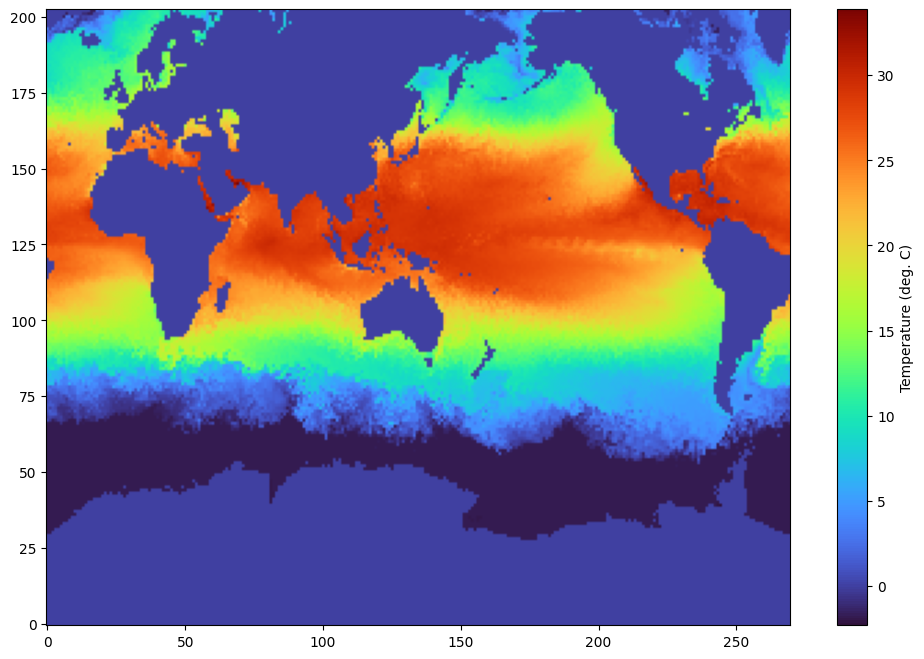

In [9]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
im= axes.imshow(data[0,:,:], aspect='auto',origin='lower',cmap='turbo')
cbar = plt.colorbar(im, ax=axes)
cbar.set_label('Temperature (deg. C)')
plt.show()


## **But, what if you want to see the full data for a certain region at a certain depth?**
Just set the right x,y,z while reading the data. x and y are the bounding box, z is the depth/layer. 

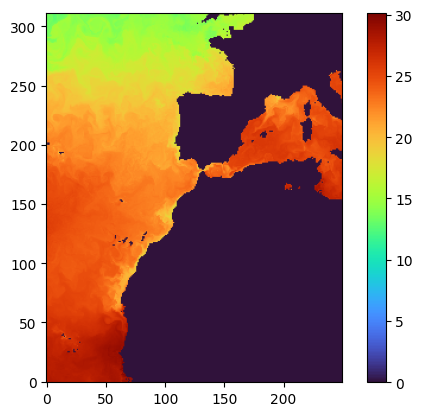

In [10]:
data1=db.db.read(time=1,z=[0,1],quality=-6,x=[500,2500],y=[8500,11000])
plt.imshow(data1[0,:,:], origin='lower',cmap='turbo')
plt.colorbar()

In [11]:
data1.shape #

(1, 312, 250)

# **Step 5: Save the data for the region locally**
You can save the data locally as you want. For example, here we are only saving the region shown above as a numpy array.

In [12]:
np.save('test_region.npy', data1)

# **Step 6: Load the locally saved region and visualize using matplotlib**

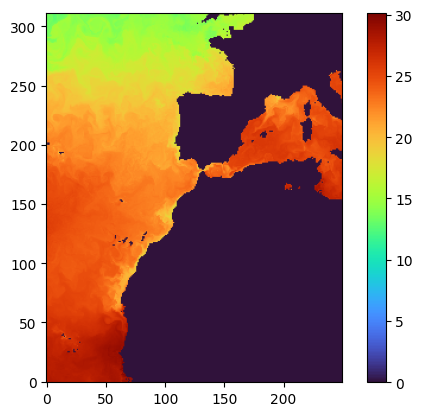

In [13]:
local_data=np.load('test_region.npy')
plt.imshow(local_data[0,:,:], origin='lower',cmap='turbo')
plt.colorbar()

# **Step 7: Horizontal Slicing**

In [14]:
data1=db.db.read(time=1,x=[500,2500],y=[10500,10501])
data1.shape


(90, 1, 2000)

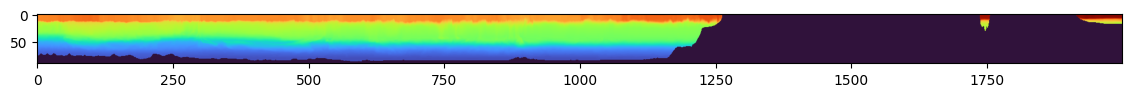

In [22]:
plt.figure(figsize=(14,8))
plt.imshow(data1[:,0,:],cmap='turbo')
#plt.colorbar()

### *Please reach out to Aashish Panta, Giorgio Scorzelli or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Giorgio Scorzelli (scrgiorgio@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)